In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from scipy.stats.mstats import winsorize
import warnings

warnings.filterwarnings('ignore')

In [6]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from useducation',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

In [13]:
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


# Data Cleaning Assignment

In [23]:
#df.isnull().sum()*100/df.isnull().count()

In [20]:
#df["ENROLL"].fillna(df["ENROLL"].mean(), inplace=True)
#df["TOTAL_REVENUE"].fillna(df["TOTAL_REVENUE"].mean(), inplace=True)

#df.isnull().sum()*100/df.isnull().count()

In [4]:
#df.groupby('YEAR', as_index=False)['TOTAL_REVENUE'].mean()
df["TOTAL_REVENUE"] = df.groupby("YEAR").transform(lambda x: x.fillna(x.mean()))

df.isnull().sum()*100/df.isnull().count()

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                          17.627346
TOTAL_REVENUE                    7.171582
FEDERAL_REVENUE                 14.209115
STATE_REVENUE                   14.209115
LOCAL_REVENUE                   14.209115
TOTAL_EXPENDITURE               14.209115
INSTRUCTION_EXPENDITURE         14.209115
SUPPORT_SERVICES_EXPENDITURE    14.209115
OTHER_EXPENDITURE               17.627346
CAPITAL_OUTLAY_EXPENDITURE      14.209115
GRADES_PK_G                     11.595174
GRADES_KG_G                      8.847185
GRADES_4_G                       8.780161
GRADES_8_G                       8.780161
GRADES_12_G                      8.780161
GRADES_1_8_G                     8.780161
GRADES_9_12_G                    8.780161
GRADES_ALL_G                    11.595174
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

In [15]:
df3 = df.interpolate()
df3.isnull().sum()*100/df3.isnull().count()

PRIMARY_KEY                     0.000000
STATE                           0.000000
YEAR                            0.000000
ENROLL                          2.412869
TOTAL_REVENUE                   0.000000
FEDERAL_REVENUE                 0.000000
STATE_REVENUE                   0.000000
LOCAL_REVENUE                   0.000000
TOTAL_EXPENDITURE               0.000000
INSTRUCTION_EXPENDITURE         0.000000
SUPPORT_SERVICES_EXPENDITURE    0.000000
OTHER_EXPENDITURE               2.412869
CAPITAL_OUTLAY_EXPENDITURE      0.000000
GRADES_PK_G                     0.000000
GRADES_KG_G                     0.000000
GRADES_4_G                      0.000000
GRADES_8_G                      0.000000
GRADES_12_G                     0.000000
GRADES_1_8_G                    0.000000
GRADES_9_12_G                   0.000000
GRADES_ALL_G                    0.000000
AVG_MATH_4_SCORE                0.000000
AVG_MATH_8_SCORE                0.000000
AVG_READING_4_SCORE             0.000000
AVG_READING_8_SC

- Determine all the variable types and find the fraction of the missing values for each variable.

- Notice that the data has a time dimension (year). For this assignment, forget about time and treat all the observations as if they're from the same year. Choose a strategy to deal with the missing values for each variables. For which variables would filling in the missing values with some value make sense? For which might tossing out the records entirely make sense?
        
        • I ran code that replaced null vaules in "YEAR" and "ENROLL" with the mean value. I think doing that with all the columns minus the columns that begin with AVG since those seem too far gone as far as null values.
        
- Now, take into account the time factor. Replicate your second answer but this time fill in the missing values by using a statistic that is calculated within the year of the observation. For example, if you want to fill a missing value for a variable with the mean of that variable, calculate the mean by using only the observations for that specific year.
        
        • df["TOTAL_REVENUE"] = df.groupby("YEAR").transform(lambda x: x.fillna(x.mean()))
        
- This time, fill in the missing values using interpolation (extrapolation).

        • df.interpolate(method='pad', limit=2)
        
- Compare your results for the 2nd, 3rd, and 4th questions. Do you find any meaningful differences?

        • Interpolation is a quick way to replace null values with neighboring values. I feel this isn't the best way considering you could be duplicating bad data? I think using .groupby() with "YEAR" column and .mean() was a clean way of filling in null values.

# Outlier Assignment

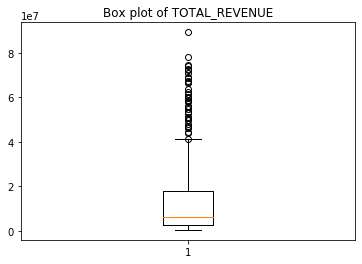

In [30]:
plt.boxplot(df3["TOTAL_REVENUE"])
plt.title("Box plot of TOTAL_REVENUE")
plt.show()

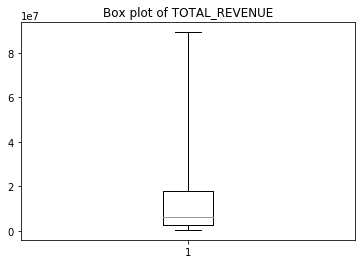

In [19]:
plt.boxplot(df3["TOTAL_REVENUE"], whis=20)
plt.title("Box plot of TOTAL_REVENUE")
plt.show()

In [25]:
winsorized_revenue = winsorize(df3["TOTAL_REVENUE"], (0, 0.10))

winsorized_revenue

masked_array(data=[ 2678885.,  1049591.,  3258079., ..., 23766529.,
                   23766529., 23766529.],
             mask=False,
       fill_value=1e+20)

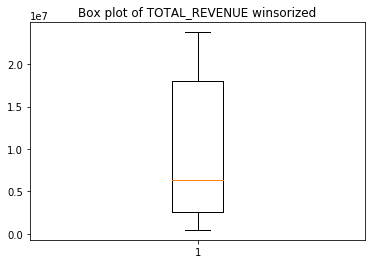

In [26]:
plt.boxplot(winsorized_revenue)
plt.title("Box plot of TOTAL_REVENUE winsorized")
plt.show()

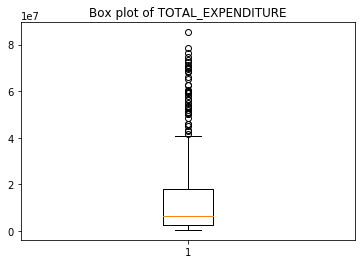

In [21]:
plt.boxplot(df3["TOTAL_EXPENDITURE"])
plt.title("Box plot of TOTAL_EXPENDITURE")
plt.show()

In [27]:
winsorized_expend = winsorize(df3["TOTAL_EXPENDITURE"], (0, 0.10))

winsorized_expend

masked_array(data=[ 2653798.,   972488.,  3401580., ..., 23352516.,
                   23352516., 23352516.],
             mask=False,
       fill_value=1e+20)

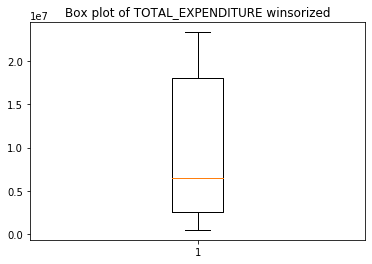

In [29]:
plt.boxplot(winsorized_expend)
plt.title("Box plot of TOTAL_EXPENDITURE winsorized")
plt.show()

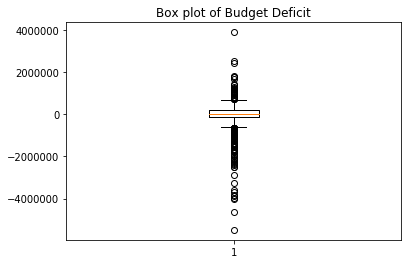

In [35]:
budget_deficit = df3["TOTAL_REVENUE"] - df3["TOTAL_EXPENDITURE"]
#print(budget_deficit)

plt.boxplot(budget_deficit)
plt.title("Box plot of Budget Deficit")
plt.show()

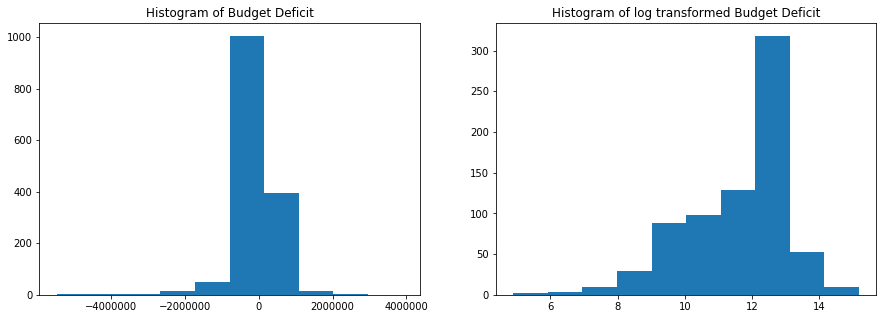

In [36]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.hist(budget_deficit)
plt.title("Histogram of Budget Deficit")

plt.subplot(1,2,2)
plt.hist(np.log(budget_deficit))
plt.title("Histogram of log transformed Budget Deficit")
plt.show()

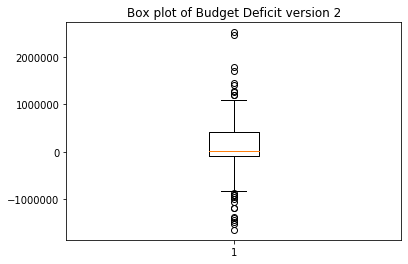

In [38]:
budget_deficit2 = winsorized_revenue - winsorized_expend

plt.boxplot(budget_deficit2)
plt.title("Box plot of Budget Deficit version 2")
plt.show()

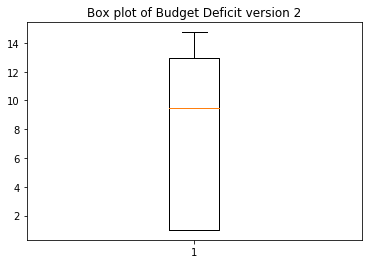

In [40]:
plt.boxplot(np.log(budget_deficit2))
plt.title("Box plot of Budget Deficit version 2")
plt.show()

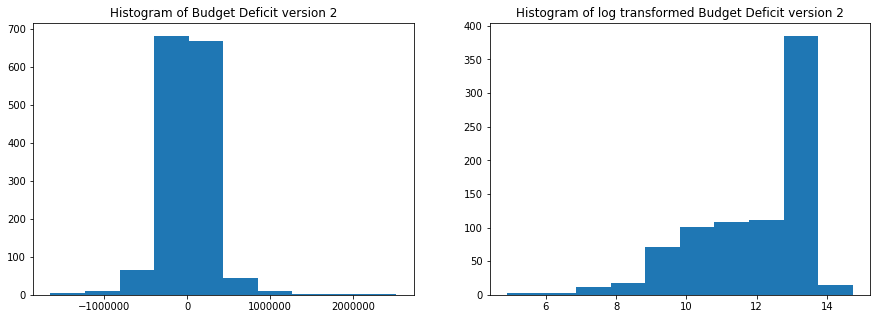

In [39]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.hist(budget_deficit2)
plt.title("Histogram of Budget Deficit version 2")

plt.subplot(1,2,2)
plt.hist(np.log(budget_deficit2))
plt.title("Histogram of log transformed Budget Deficit version 2")
plt.show()

In [42]:
print(budget_deficit.mean())


print(np.log(budget_deficit.mean()))

65818.22888739947
11.094652113709275


## For question #6; Answer: I would choose the technique used in question #4